<a href="https://colab.research.google.com/github/littlegod20/MachineLearningproject/blob/main/Urban_modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np

In [ ]:
# Reading the csv file for the Train dataset
data = pd.read_csv("Train.csv")
data

,Place_ID X Date,Date,Place_ID,target,target_min,target_max,target_variance,target_count,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,...,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,L3_CH4_CH4_column_volume_mixing_ratio_dry_air,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth,L3_CH4_sensor_azimuth_angle,L3_CH4_sensor_zenith_angle,L3_CH4_solar_azimuth_angle,L3_CH4_solar_zenith_angle
0,010Q650 X 2020-01-02,2020-01-02,010Q650,38.0,23.0,53.0,769.50,92,11.000000,60.200001,...,38.593017,-61.752587,22.363665,1793.793579,3227.855469,0.010579,74.481049,37.501499,-62.142639,22.545118
1,010Q650 X 2020-01-03,2020-01-03,010Q650,39.0,25.0,63.0,1319.85,91,14.600000,48.799999,...,59.624912,-67.693509,28.614804,1789.960449,3384.226562,0.015104,75.630043,55.657486,-53.868134,19.293652
2,010Q650 X 2020-01-04,2020-01-04,010Q650,24.0,8.0,56.0,1181.96,96,16.400000,33.400002,...,49.839714,-78.342701,34.296977,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,010Q650 X 2020-01-05,2020-01-05,010Q650,49.0,10.0,55.0,1113.67,96,6.911948,21.300001,...,29.181258,-73.896588,30.545446,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,010Q650 X 2020-01-06,2020-01-06,010Q650,21.0,9.0,52.0,1164.82,95,13.900001,44.700001,...,0.797294,-68.612480,26.899694,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30552,YWSFY6Q X 2020-03-15,2020-03-15,YWSFY6Q,22.0,14.0,83.0,3848.86,72,6.700000,68.300003,...,54.302954,12.312248,49.871571,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30553,YWSFY6Q X 2020-03-16,2020-03-16,YWSFY6Q,53.0,30.0,146.0,9823.87,72,6.300000,77.700005,...,36.170757,-129.236726,49.779531,1863.555567,3475.020107,0.052920,-96.149506,33.230234,-157.067467,49.912310
30554,YWSFY6Q X 2020-03-17,2020-03-17,YWSFY6Q,85.0,52.0,153.0,8900.85,72,7.100000,68.500000,...,8.955216,-162.856069,48.459205,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30555,YWSFY6Q X 2020-03-18,2020-03-18,YWSFY6Q,103.0,33.0,149.0,13963.90,72,19.100000,66.300003,...,17.974815,-168.906764,47.293537,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.dtypes

Place_ID X Date                  object
Date                             object
Place_ID                         object
target                          float64
target_min                      float64
                                 ...   
L3_CH4_aerosol_optical_depth    float64
L3_CH4_sensor_azimuth_angle     float64
L3_CH4_sensor_zenith_angle      float64
L3_CH4_solar_azimuth_angle      float64
L3_CH4_solar_zenith_angle       float64
Length: 82, dtype: object

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Checking for dataset properties
data.describe()

,target,target_min,target_max,target_variance,target_count,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,...,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,L3_CH4_CH4_column_volume_mixing_ratio_dry_air,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth,L3_CH4_sensor_azimuth_angle,L3_CH4_sensor_zenith_angle,L3_CH4_solar_azimuth_angle,L3_CH4_solar_zenith_angle
count,30557.000000,30557.000000,30557.000000,3.055700e+04,30557.000000,30557.000000,30557.000000,30557.000000,30557.000000,30557.000000,...,23320.000000,23320.000000,23320.000000,5792.000000,5792.000000,5792.000000,5792.000000,5792.000000,5792.000000,5792.000000
mean,61.148045,29.025866,117.992234,7.983756e+03,125.831135,15.302326,70.552747,0.006004,9.321342,0.416886,...,35.590916,-123.697777,46.533951,923.231949,1711.793613,0.016227,1.254703,13.849040,-69.098594,23.100630
std,46.861309,33.119775,100.417713,4.863090e+04,146.581856,10.688573,18.807884,0.003787,9.343226,2.707990,...,18.955228,71.916036,14.594267,929.633988,1741.299304,0.027016,55.101250,18.004375,84.702355,24.786350
min,1.000000,1.000000,1.000000,0.000000e+00,2.000000,0.420044,5.128572,0.000139,-34.647879,-15.559646,...,0.000000,-179.880630,0.000000,0.000000,0.000000,0.000000,-105.367363,0.000000,-179.947422,0.000000
25%,25.000000,5.000000,60.000000,1.064920e+03,44.000000,7.666667,58.600002,0.003403,3.123071,-1.097864,...,19.451524,-165.882624,36.693094,0.000000,0.000000,0.000000,0.000000,0.000000,-161.726937,0.000000
50%,50.000000,15.000000,91.000000,2.395350e+03,72.000000,12.200000,74.099998,0.004912,8.478424,0.222092,...,37.918838,-156.637162,47.445010,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,80.000000,44.000000,155.000000,5.882550e+03,150.000000,19.900000,85.450001,0.007562,16.201563,1.772925,...,52.270055,-118.453598,57.438181,1861.674119,3393.541633,0.023829,62.245728,27.412303,0.000000,47.090635
max,815.000000,438.000000,999.000000,1.841490e+06,1552.000000,72.599998,100.000000,0.021615,37.437921,17.955124,...,66.111289,179.776125,79.631711,2112.522949,6478.550544,0.210483,77.355232,59.972710,179.813344,69.992363


In [ ]:
data.nunique()

Place_ID X Date                 30557
Date                               94
Place_ID                          340
target                            375
target_min                        269
                                ...  
L3_CH4_aerosol_optical_depth     2874
L3_CH4_sensor_azimuth_angle      2874
L3_CH4_sensor_zenith_angle       2874
L3_CH4_solar_azimuth_angle       2874
L3_CH4_solar_zenith_angle        2874
Length: 82, dtype: int64

In [ ]:
data.columns

Index(['Place_ID X Date', 'Date', 'Place_ID', 'target', 'target_min',
       'target_max', 'target_variance', 'target_count',
       'precipitable_water_entire_atmosphere',
       'relative_humidity_2m_above_ground',
       'specific_humidity_2m_above_ground', 'temperature_2m_above_ground',
       'u_component_of_wind_10m_above_ground',
       'v_component_of_wind_10m_above_ground',
       'L3_NO2_NO2_column_number_density',
       'L3_NO2_NO2_slant_column_number_density',
       'L3_NO2_absorbing_aerosol_index', 'L3_NO2_cloud_fraction',
       'L3_NO2_sensor_altitude', 'L3_NO2_sensor_azimuth_angle',
       'L3_NO2_sensor_zenith_angle', 'L3_NO2_solar_azimuth_angle',
       'L3_NO2_solar_zenith_angle',
       'L3_NO2_stratospheric_NO2_column_number_density',
       'L3_NO2_tropopause_pressure',
       'L3_NO2_tropospheric_NO2_column_number_density',
       'L3_O3_O3_column_number_density', 'L3_O3_O3_effective_temperature',
       'L3_O3_cloud_fraction', 'L3_O3_sensor_azimuth_angle',
   

In [ ]:
# Checking for number of Nan values in each column of dataset
data.isnull().sum()

Place_ID X Date                     0
Date                                0
Place_ID                            0
target                              0
target_min                          0
                                ...  
L3_CH4_aerosol_optical_depth    24765
L3_CH4_sensor_azimuth_angle     24765
L3_CH4_sensor_zenith_angle      24765
L3_CH4_solar_azimuth_angle      24765
L3_CH4_solar_zenith_angle       24765
Length: 82, dtype: int64

# Droping redundant data

In [ ]:
# Checking the columns for unwnated columns
data.columns

Index(['Place_ID X Date', 'Date', 'Place_ID', 'target', 'target_min',
       'target_max', 'target_variance', 'target_count',
       'precipitable_water_entire_atmosphere',
       'relative_humidity_2m_above_ground',
       'specific_humidity_2m_above_ground', 'temperature_2m_above_ground',
       'u_component_of_wind_10m_above_ground',
       'v_component_of_wind_10m_above_ground',
       'L3_NO2_NO2_column_number_density',
       'L3_NO2_NO2_slant_column_number_density',
       'L3_NO2_absorbing_aerosol_index', 'L3_NO2_cloud_fraction',
       'L3_NO2_sensor_altitude', 'L3_NO2_sensor_azimuth_angle',
       'L3_NO2_sensor_zenith_angle', 'L3_NO2_solar_azimuth_angle',
       'L3_NO2_solar_zenith_angle',
       'L3_NO2_stratospheric_NO2_column_number_density',
       'L3_NO2_tropopause_pressure',
       'L3_NO2_tropospheric_NO2_column_number_density',
       'L3_O3_O3_column_number_density', 'L3_O3_O3_effective_temperature',
       'L3_O3_cloud_fraction', 'L3_O3_sensor_azimuth_angle',
   

In [ ]:
# Checking for the index of column in dataset
data.columns.get_loc('precipitable_water_entire_atmosphere')#L3_HCHO_tropospheric_HCHO_column_number_density, L3_NO2_tropospheric_NO2_column_number_density

8

In [ ]:
# Dropping any unwanted column in the dataset
data2 = data.drop(data.columns[[0, 1, 2, 17, 18, 19, 20, 21, 22, 24, 27, 28, 29, 30, 31, 32, 35, 36, 37, 38, 39, 40, 42, 43, 44, 45, 46, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 61, 62, 63, 64, 65, 70, 71, 72, 73, 74, 75, 78, 79, 80, 81]], axis=1)
data2

,target,target_min,target_max,target_variance,target_count,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,...,L3_HCHO_HCHO_slant_column_number_density,L3_HCHO_tropospheric_HCHO_column_number_density,L3_HCHO_tropospheric_HCHO_column_number_density_amf,L3_AER_AI_absorbing_aerosol_index,L3_SO2_SO2_column_number_density,L3_SO2_SO2_column_number_density_amf,L3_SO2_SO2_slant_column_number_density,L3_SO2_absorbing_aerosol_index,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth
0,38.0,23.0,53.0,769.50,92,11.000000,60.200001,0.00804,18.516840,1.996377,...,-0.000010,0.000064,0.566828,-1.231330,-0.000127,0.312521,-0.000040,-1.861476,3227.855469,0.010579
1,39.0,25.0,63.0,1319.85,91,14.600000,48.799999,0.00839,22.546533,3.330430,...,0.000114,0.000171,0.858446,-1.082553,0.000150,0.433957,0.000050,-1.452612,3384.226562,0.015104
2,24.0,8.0,56.0,1181.96,96,16.400000,33.400002,0.00750,27.031030,5.065727,...,0.000027,0.000124,0.910536,-1.001241,0.000150,0.356925,0.000053,-1.572950,NaN,NaN
3,49.0,10.0,55.0,1113.67,96,6.911948,21.300001,0.00391,23.971857,3.004001,...,0.000023,0.000081,1.132571,-0.777023,0.000227,0.584522,0.000110,-1.239317,NaN,NaN
4,21.0,9.0,52.0,1164.82,95,13.900001,44.700001,0.00535,16.816309,2.621787,...,0.000037,0.000140,0.649359,0.366324,0.000390,0.408047,0.000159,0.202489,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30552,22.0,14.0,83.0,3848.86,72,6.700000,68.300003,0.00352,4.256799,-4.810586,...,-0.000003,0.000024,0.857937,-1.412609,0.000312,0.203573,0.000063,-1.953480,NaN,NaN
30553,53.0,30.0,146.0,9823.87,72,6.300000,77.700005,0.00341,2.067438,-2.346421,...,-0.000034,-0.000014,0.963129,-1.448509,0.000362,0.234613,0.000090,-2.178236,3475.020107,0.052920
30554,85.0,52.0,153.0,8900.85,72,7.100000,68.500000,0.00356,4.438623,0.095703,...,0.000068,0.000094,0.939789,-1.722478,0.000107,0.263715,0.000031,-2.365827,NaN,NaN
30555,103.0,33.0,149.0,13963.90,72,19.100000,66.300003,0.00523,10.573236,0.434940,...,-0.000017,0.000063,1.273336,-2.042785,0.000014,0.546447,-0.000008,-2.784346,NaN,NaN


In [ ]:
# Checking the table after dropping the unwanted columns
data2.columns

Index(['target', 'target_min', 'target_max', 'target_variance', 'target_count',
       'precipitable_water_entire_atmosphere',
       'relative_humidity_2m_above_ground',
       'specific_humidity_2m_above_ground', 'temperature_2m_above_ground',
       'u_component_of_wind_10m_above_ground',
       'v_component_of_wind_10m_above_ground',
       'L3_NO2_NO2_column_number_density',
       'L3_NO2_NO2_slant_column_number_density',
       'L3_NO2_absorbing_aerosol_index',
       'L3_NO2_stratospheric_NO2_column_number_density',
       'L3_NO2_tropospheric_NO2_column_number_density',
       'L3_O3_O3_column_number_density', 'L3_CO_CO_column_number_density',
       'L3_CO_H2O_column_number_density',
       'L3_HCHO_HCHO_slant_column_number_density',
       'L3_HCHO_tropospheric_HCHO_column_number_density',
       'L3_HCHO_tropospheric_HCHO_column_number_density_amf',
       'L3_AER_AI_absorbing_aerosol_index', 'L3_SO2_SO2_column_number_density',
       'L3_SO2_SO2_column_number_density_amf',

In [ ]:
data2.isnull().sum()

target                                                     0
target_min                                                 0
target_max                                                 0
target_variance                                            0
target_count                                               0
precipitable_water_entire_atmosphere                       0
relative_humidity_2m_above_ground                          0
specific_humidity_2m_above_ground                          0
temperature_2m_above_ground                                0
u_component_of_wind_10m_above_ground                       0
v_component_of_wind_10m_above_ground                       0
L3_NO2_NO2_column_number_density                        2189
L3_NO2_NO2_slant_column_number_density                  2189
L3_NO2_absorbing_aerosol_index                          2189
L3_NO2_stratospheric_NO2_column_number_density          2190
L3_NO2_tropospheric_NO2_column_number_density           8669
L3_O3_O3_column_number_d

In [ ]:
#Replacing all zeros in columns with Nans and checking for Nan values before interpolation
data2.replace([0], np.nan, inplace =True)
data2.isnull().sum().sum()

152135

In [ ]:
# Drop all Nan values
data3 = data2.dropna()
data3

,target,target_min,target_max,target_variance,target_count,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,...,L3_HCHO_HCHO_slant_column_number_density,L3_HCHO_tropospheric_HCHO_column_number_density,L3_HCHO_tropospheric_HCHO_column_number_density_amf,L3_AER_AI_absorbing_aerosol_index,L3_SO2_SO2_column_number_density,L3_SO2_SO2_column_number_density_amf,L3_SO2_SO2_slant_column_number_density,L3_SO2_absorbing_aerosol_index,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth
0,38.0,23.0,53.0,769.50,92,11.000000,60.200001,0.008040,18.516840,1.996377,...,-0.000010,0.000064,0.566828,-1.231330,-0.000127,0.312521,-0.000040,-1.861476,3227.855469,0.010579
1,39.0,25.0,63.0,1319.85,91,14.600000,48.799999,0.008390,22.546533,3.330430,...,0.000114,0.000171,0.858446,-1.082553,0.000150,0.433957,0.000050,-1.452612,3384.226562,0.015104
21,34.0,15.0,60.0,2122.31,96,25.200001,61.500000,0.009592,20.953058,1.796702,...,0.000053,0.000157,0.641552,-0.902966,0.000297,0.430819,0.000127,-1.451986,3663.675811,0.031800
68,42.0,30.0,54.0,747.17,96,14.418541,27.800001,0.004780,22.636102,2.942937,...,0.000011,0.000098,0.550115,-1.053174,-0.000072,0.323811,-0.000023,-1.715380,3036.298987,0.006578
72,18.0,10.0,35.0,489.24,96,21.000000,53.100002,0.007870,20.194482,2.445124,...,-0.000033,0.000024,0.579985,-0.961874,-0.000113,0.401646,-0.000038,-1.608761,3339.918213,0.018579
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30510,23.0,14.0,70.0,2351.20,72,19.269308,85.200005,0.006056,8.793634,3.335283,...,0.000026,0.000050,0.876843,-1.220519,0.000484,0.158830,0.000036,-1.803997,3752.561556,0.018772
30524,83.0,56.0,124.0,3155.00,24,8.900001,88.700005,0.004450,3.982599,-1.304509,...,0.000035,0.000073,0.916258,-1.075738,0.000220,0.248021,0.000054,-2.518281,4087.396973,0.034164
30542,63.0,24.0,106.0,5620.89,66,7.600000,74.800003,0.003620,3.266931,1.037644,...,-0.000004,0.000018,1.010326,-1.336594,0.000564,0.280658,0.000126,-1.864423,3314.133968,0.022721
30549,56.0,23.0,156.0,16293.50,72,18.400000,70.000000,0.005619,10.704462,-1.854288,...,0.000101,0.000123,0.994363,-1.503132,0.000509,0.312700,0.000159,-2.189909,3284.730809,0.012401


In [ ]:
# Checking for Nan values after interpolating
data3.isnull().sum().sum()

0

In [ ]:
data3.describe()

,target,target_min,target_max,target_variance,target_count,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,...,L3_HCHO_HCHO_slant_column_number_density,L3_HCHO_tropospheric_HCHO_column_number_density,L3_HCHO_tropospheric_HCHO_column_number_density_amf,L3_AER_AI_absorbing_aerosol_index,L3_SO2_SO2_column_number_density,L3_SO2_SO2_column_number_density_amf,L3_SO2_SO2_slant_column_number_density,L3_SO2_absorbing_aerosol_index,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth
count,2558.000000,2558.000000,2558.000000,2.558000e+03,2558.000000,2558.000000,2558.000000,2558.000000,2558.000000,2558.000000,...,2558.000000,2558.000000,2558.000000,2558.000000,2558.000000,2558.000000,2558.000000,2558.000000,2558.000000,2558.000000
mean,77.215911,39.194722,144.044722,1.326598e+04,113.068022,11.918943,62.118294,0.005229,9.707984,0.246560,...,0.000061,0.000118,0.928447,-1.285638,0.000175,0.347138,0.000047,-1.931270,3441.442111,0.032400
std,54.225765,35.871226,116.010300,8.158558e+04,127.525893,7.717902,19.936142,0.003144,9.128003,2.162116,...,0.000064,0.000090,0.210820,0.386783,0.000471,0.135381,0.000112,0.420981,360.989250,0.031025
min,3.000000,1.000000,4.000000,3.600000e+00,2.000000,1.000000,9.300000,0.000350,-25.939261,-9.357020,...,-0.000180,-0.000114,0.479116,-2.318478,-0.004106,0.102817,-0.000593,-3.806379,2522.139630,0.001117
25%,37.250000,9.000000,72.000000,1.247327e+03,31.000000,6.156633,47.577501,0.003067,3.381669,-0.973033,...,0.000018,0.000055,0.802712,-1.546021,-0.000075,0.251807,-0.000026,-2.214030,3222.316436,0.012155
50%,63.500000,30.000000,119.000000,3.246490e+03,72.000000,10.000000,62.799999,0.004457,9.419916,0.227541,...,0.000053,0.000099,0.913505,-1.338052,0.000111,0.327465,0.000039,-1.970164,3389.532481,0.022863
75%,108.000000,59.000000,171.000000,9.368410e+03,143.000000,15.825198,78.587500,0.006669,16.802255,1.375161,...,0.000092,0.000170,1.024305,-1.072701,0.000357,0.420228,0.000111,-1.693771,3581.695137,0.040732
max,815.000000,203.000000,999.000000,1.841490e+06,1463.000000,48.600001,99.950001,0.018467,33.877913,13.298136,...,0.000397,0.000526,3.038165,1.019462,0.004362,1.376392,0.000742,0.860424,6478.550544,0.210483


In [ ]:
data3.isnull().sum().sum()

0

# Checking for outliers in the dataset

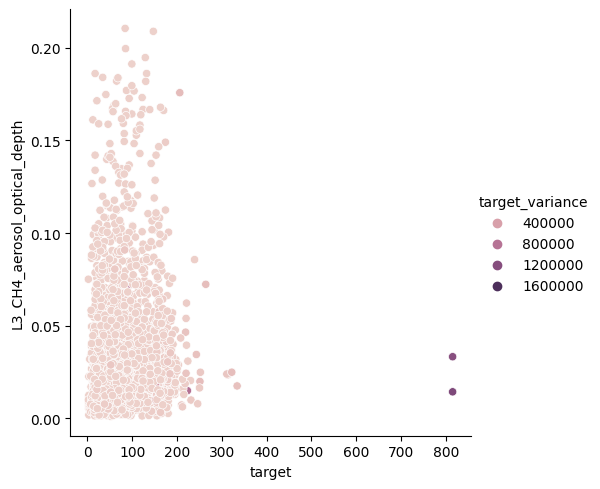

In [ ]:
#Ploting the target against various variables to check for their relationship
sns.relplot(x = 'target', y= 'L3_CH4_aerosol_optical_depth', data = data2, hue='target_variance')#L3_AER_AI_absorbing_aerosol_index

In [ ]:
# Checking for the maximum and minimum threshold for the following columns with outliers using their quantiles
target_Min, target_Max = data3['target'].quantile([0, 0.99876])
targetmin_Min, targetmin_Max = data3['target_min'].quantile([0, 0.9996])
targetmax_Min, targetmax_Max = data3['target_max'].quantile([0, 0.998])
targetvariance_Min, targetvariance_Max = data3['target_variance'].quantile([0, 0.99])
targetcount_Min, targetcount_Max = data3['target_count'].quantile([0, 0.99696])
L3_CH4_aerosol_height_Min, L3_CH4_aerosol_height_Max = data3['L3_CH4_aerosol_height'].quantile([0, 0.9996])

NO2slant_Min, NO2slant_Max = data3['L3_NO2_NO2_slant_column_number_density'].quantile([0.999, 0.998])
NO2coldens_Min, NO2coldens_Max = data3['L3_NO2_NO2_column_number_density'].quantile([0.679, 0.999])
NO2abs_aeros_Min, NO2abs_aeros_Max = data3['L3_NO2_absorbing_aerosol_index'].quantile([0.0003, 0.99989])
NO2_tropo_Min, NO2_tropo_Max = data3['L3_NO2_tropospheric_NO2_column_number_density'].quantile([0.84, 0.9995])
L3_COcoldense_Min, L3_COcoldense_Max = data3['L3_CO_CO_column_number_density'].quantile([0, 0.9996])
L3_CO_H2O_coldens_Min, L3_CO_H2O_coldens_Max = data3['L3_CO_H2O_column_number_density'].quantile([0, 0.9996])
HCHO_tropo_Min, HCHO_tropo_Max = data3['L3_HCHO_tropospheric_HCHO_column_number_density'].quantile([0.000097, 0.9996])
AERindex_Min, AERindex_Max = data3['L3_AER_AI_absorbing_aerosol_index'].quantile([0.0000099, 0.9999])
L3_SO2coldens_Min, L3_SO2coldens_Max = data3['L3_SO2_SO2_column_number_density'].quantile([0.000999, 0.9999])
L3_SO2slant_Min, L3_SO2slant_Max = data3['L3_SO2_SO2_slant_column_number_density'].quantile([0.0000999, 0.9999])
L3_SO2abs_aero_Min, L3_SO2abs_aero_Max = data3['L3_SO2_absorbing_aerosol_index'].quantile([0, 0.9998])
L3_CH4aero_optical_Min, L3_CH4aero_optical_Max = data3['L3_CH4_aerosol_optical_depth'].quantile([0, 0.994])

In [ ]:
L3_CH4aero_optical_Min, L3_CH4aero_optical_Max = data3['L3_CH4_aerosol_optical_depth'].quantile([0, 0.994])
L3_SO2abs_aero_Min, L3_SO2abs_aero_Max

(-3.806378879896193, 0.8167819787520085)

In [ ]:
data3.columns

Index(['target', 'target_min', 'target_max', 'target_variance', 'target_count',
       'precipitable_water_entire_atmosphere',
       'relative_humidity_2m_above_ground',
       'specific_humidity_2m_above_ground', 'temperature_2m_above_ground',
       'u_component_of_wind_10m_above_ground',
       'v_component_of_wind_10m_above_ground',
       'L3_NO2_NO2_column_number_density',
       'L3_NO2_NO2_slant_column_number_density',
       'L3_NO2_absorbing_aerosol_index',
       'L3_NO2_stratospheric_NO2_column_number_density',
       'L3_NO2_tropospheric_NO2_column_number_density',
       'L3_O3_O3_column_number_density', 'L3_CO_CO_column_number_density',
       'L3_CO_H2O_column_number_density',
       'L3_HCHO_HCHO_slant_column_number_density',
       'L3_HCHO_tropospheric_HCHO_column_number_density',
       'L3_HCHO_tropospheric_HCHO_column_number_density_amf',
       'L3_AER_AI_absorbing_aerosol_index', 'L3_SO2_SO2_column_number_density',
       'L3_SO2_SO2_column_number_density_amf',

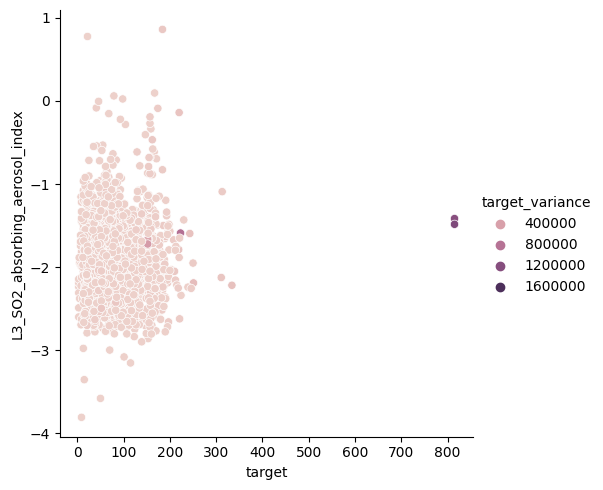

In [ ]:
#Ploting the target against various variables to check for their relationship
sns.relplot(x = 'target', y= 'L3_SO2_absorbing_aerosol_index', data = data3, hue='target_variance')

In [ ]:
#data3.replace({'L3_NO2_NO2_column_number_density':{0:np.nan}, 'L3_NO2_NO2_slant_column_number_density':{0:np.nan}, 'L3_NO2_absorbing_aerosol_index':{0:np.nan}, 'L3_NO2_stratospheric_NO2_column_number_density':{0:np.nan}, 'L3_NO2_tropospheric_NO2_column_number_density':{0:np.nan}, 'L3_O3_O3_column_number_density':{0:np.nan}, 'L3_CO_CO_column_number_density':{0:np.nan}, 'L3_CO_H2O_column_number_density':{0:np.nan}, 'L3_HCHO_HCHO_slant_column_number_density':{0:np.nan}, 'L3_HCHO_tropospheric_HCHO_column_number_density':{0:np.nan}, 'L3_HCHO_tropospheric_HCHO_column_number_density_amf':{0:np.nan}, 'L3_AER_AI_absorbing_aerosol_index':{0:np.nan}, 'L3_SO2_SO2_column_number_density':{0:np.nan}, 'L3_SO2_SO2_column_number_density_amf':{0:np.nan}, 'L3_SO2_SO2_slant_column_number_density':{0:np.nan}, 'L3_SO2_absorbing_aerosol_index':{0:np.nan}, 'L3_CH4_aerosol_height':{0:np.nan}, 'L3_CH4_aerosol_optical_depth':{0:np.nan}})
#data3.isnull().sum().sum()

In [ ]:
# Removing all outliers in the various columns and all columns containing too many zeros in data3
#data3 = data3.replace({'L3_NO2_NO2_column_number_density':{0:np.nan}, 'L3_NO2_NO2_slant_column_number_density':{0:np.nan}, 'L3_NO2_absorbing_aerosol_index':{0:np.nan}, 'L3_NO2_stratospheric_NO2_column_number_density':{0:np.nan}, 'L3_NO2_tropospheric_NO2_column_number_density':{0:np.nan}, 'L3_O3_O3_column_number_density':{0:np.nan}, 'L3_CO_CO_column_number_density':{0:np.nan}, 'L3_CO_H2O_column_number_density':{0:np.nan}, 'L3_HCHO_HCHO_slant_column_number_density':{0:np.nan}, 'L3_HCHO_tropospheric_HCHO_column_number_density':{0:np.nan}, 'L3_HCHO_tropospheric_HCHO_column_number_density_amf':{0:np.nan}, 'L3_AER_AI_absorbing_aerosol_index':{0:np.nan}, 'L3_SO2_SO2_column_number_density':{0:np.nan}, 'L3_SO2_SO2_column_number_density_amf':{0:np.nan}, 'L3_SO2_SO2_slant_column_number_density':{0:np.nan}, 'L3_SO2_absorbing_aerosol_index':{0:np.nan}, 'L3_CH4_aerosol_height':{0:np.nan}, 'L3_CH4_aerosol_optical_depth':{0:np.nan}})
#data3.isnull().sum().sum()

data4 = data3[(data3.target<target_Max)]
data5 = data4[(data4.target_min<targetmin_Max)]
data6 = data5[(data5.target_max<targetmax_Max)]
data7 = data6[(data6.target_variance<targetvariance_Max)]
data8 = data7[(data7.target_count<targetcount_Max)]



data9 = data8[(data8.L3_NO2_NO2_slant_column_number_density<NO2slant_Max)]
data10 = data9[(data9.L3_NO2_NO2_column_number_density<NO2coldens_Max)]
data11 = data10[(data10.L3_NO2_absorbing_aerosol_index<NO2abs_aeros_Max)]
data12 = data11[(data11.L3_NO2_tropospheric_NO2_column_number_density<NO2_tropo_Max)]
data13 = data12[(data12.L3_CO_CO_column_number_density<L3_COcoldense_Max)]
data14 = data13[(data13.L3_CO_H2O_column_number_density<L3_CO_H2O_coldens_Max)]
data15 = data14[(data14.L3_HCHO_tropospheric_HCHO_column_number_density<HCHO_tropo_Max) & (data14.L3_HCHO_tropospheric_HCHO_column_number_density>HCHO_tropo_Min)]
data16 = data15[(data15.L3_AER_AI_absorbing_aerosol_index<AERindex_Max)]
data17 = data16[(data16.L3_SO2_SO2_column_number_density<L3_SO2coldens_Max) & (data16.L3_SO2_SO2_slant_column_number_density>L3_SO2coldens_Min)]
data18 = data17[(data17.L3_SO2_SO2_slant_column_number_density<L3_SO2slant_Max) & (data17.L3_SO2_absorbing_aerosol_index>L3_SO2abs_aero_Min)]
data19 = data18[(data18.L3_SO2_absorbing_aerosol_index<L3_SO2abs_aero_Max)]

data19.describe()

,target,target_min,target_max,target_variance,target_count,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,...,L3_HCHO_HCHO_slant_column_number_density,L3_HCHO_tropospheric_HCHO_column_number_density,L3_HCHO_tropospheric_HCHO_column_number_density_amf,L3_AER_AI_absorbing_aerosol_index,L3_SO2_SO2_column_number_density,L3_SO2_SO2_column_number_density_amf,L3_SO2_SO2_slant_column_number_density,L3_SO2_absorbing_aerosol_index,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth
count,2503.000000,2503.000000,2503.000000,2503.000000,2503.000000,2503.000000,2503.000000,2503.000000,2503.000000,2503.000000,...,2503.000000,2503.000000,2503.000000,2503.000000,2503.000000,2503.000000,2503.000000,2503.000000,2503.000000,2503.000000
mean,75.732841,38.958090,136.273032,7028.072093,109.780663,11.885828,62.226188,0.005221,9.653600,0.249585,...,0.000060,0.000117,0.927733,-1.291697,0.000173,0.345369,0.000047,-1.935755,3441.715960,0.032351
std,49.077260,35.521895,94.938565,10161.234739,115.608653,7.692087,19.866918,0.003142,9.055957,2.161508,...,0.000063,0.000089,0.210920,0.380546,0.000465,0.134970,0.000111,0.410842,360.488900,0.031150
min,3.000000,1.000000,4.000000,3.600000,2.000000,1.000000,9.300000,0.000350,-25.939261,-9.357020,...,-0.000180,-0.000103,0.479116,-2.318478,-0.004106,0.102817,-0.000593,-3.578479,2522.139630,0.001117
25%,37.000000,9.000000,71.000000,1228.295000,31.000000,6.156879,47.664287,0.003059,3.355376,-0.970257,...,0.000018,0.000055,0.802785,-1.548612,-0.000075,0.250020,-0.000025,-2.215485,3221.762041,0.012084
50%,63.000000,30.000000,116.000000,3173.460000,72.000000,10.000000,62.799999,0.004440,9.333246,0.232808,...,0.000052,0.000098,0.911310,-1.342191,0.000112,0.325684,0.000039,-1.971699,3389.367847,0.022743
75%,107.000000,59.000000,169.000000,9006.050000,142.000000,15.800000,78.599998,0.006634,16.669809,1.383569,...,0.000092,0.000168,1.023491,-1.077474,0.000357,0.419019,0.000111,-1.698325,3581.452558,0.040670
max,311.000000,177.000000,830.000000,97727.500000,854.000000,48.600001,99.950001,0.018467,33.877913,13.298136,...,0.000397,0.000489,3.038165,0.782063,0.003448,1.376392,0.000572,0.095164,6478.550544,0.210483


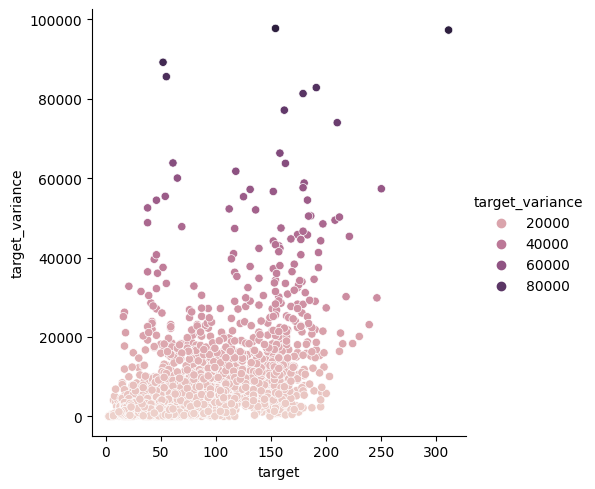

In [ ]:
sns.relplot(x = 'target', y= 'target_variance', data = data19, hue='target_variance')

# Modeling the dataset

In [ ]:
data19

,target,target_min,target_max,target_variance,target_count,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,...,L3_HCHO_HCHO_slant_column_number_density,L3_HCHO_tropospheric_HCHO_column_number_density,L3_HCHO_tropospheric_HCHO_column_number_density_amf,L3_AER_AI_absorbing_aerosol_index,L3_SO2_SO2_column_number_density,L3_SO2_SO2_column_number_density_amf,L3_SO2_SO2_slant_column_number_density,L3_SO2_absorbing_aerosol_index,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth
0,38.0,23.0,53.0,769.50,92,11.000000,60.200001,0.008040,18.516840,1.996377,...,-0.000010,0.000064,0.566828,-1.231330,-0.000127,0.312521,-0.000040,-1.861476,3227.855469,0.010579
1,39.0,25.0,63.0,1319.85,91,14.600000,48.799999,0.008390,22.546533,3.330430,...,0.000114,0.000171,0.858446,-1.082553,0.000150,0.433957,0.000050,-1.452612,3384.226562,0.015104
21,34.0,15.0,60.0,2122.31,96,25.200001,61.500000,0.009592,20.953058,1.796702,...,0.000053,0.000157,0.641552,-0.902966,0.000297,0.430819,0.000127,-1.451986,3663.675811,0.031800
68,42.0,30.0,54.0,747.17,96,14.418541,27.800001,0.004780,22.636102,2.942937,...,0.000011,0.000098,0.550115,-1.053174,-0.000072,0.323811,-0.000023,-1.715380,3036.298987,0.006578
72,18.0,10.0,35.0,489.24,96,21.000000,53.100002,0.007870,20.194482,2.445124,...,-0.000033,0.000024,0.579985,-0.961874,-0.000113,0.401646,-0.000038,-1.608761,3339.918213,0.018579
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30510,23.0,14.0,70.0,2351.20,72,19.269308,85.200005,0.006056,8.793634,3.335283,...,0.000026,0.000050,0.876843,-1.220519,0.000484,0.158830,0.000036,-1.803997,3752.561556,0.018772
30524,83.0,56.0,124.0,3155.00,24,8.900001,88.700005,0.004450,3.982599,-1.304509,...,0.000035,0.000073,0.916258,-1.075738,0.000220,0.248021,0.000054,-2.518281,4087.396973,0.034164
30542,63.0,24.0,106.0,5620.89,66,7.600000,74.800003,0.003620,3.266931,1.037644,...,-0.000004,0.000018,1.010326,-1.336594,0.000564,0.280658,0.000126,-1.864423,3314.133968,0.022721
30549,56.0,23.0,156.0,16293.50,72,18.400000,70.000000,0.005619,10.704462,-1.854288,...,0.000101,0.000123,0.994363,-1.503132,0.000509,0.312700,0.000159,-2.189909,3284.730809,0.012401


In [ ]:
# Training the model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [ ]:
data19.shape

(2503, 29)

In [ ]:
X = data19.drop(['target', 'target_min', 'target_max', 'target_variance', 'target_count'], axis=1)
y = data19['target']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 129)

In [ ]:
clf = RandomForestRegressor(n_estimators= 1000, max_depth=70, max_features=10, min_samples_leaf=2, min_samples_split= 2)

In [ ]:
X_test.head()

,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,L3_NO2_NO2_column_number_density,L3_NO2_NO2_slant_column_number_density,L3_NO2_absorbing_aerosol_index,L3_NO2_stratospheric_NO2_column_number_density,...,L3_HCHO_HCHO_slant_column_number_density,L3_HCHO_tropospheric_HCHO_column_number_density,L3_HCHO_tropospheric_HCHO_column_number_density_amf,L3_AER_AI_absorbing_aerosol_index,L3_SO2_SO2_column_number_density,L3_SO2_SO2_column_number_density_amf,L3_SO2_SO2_slant_column_number_density,L3_SO2_absorbing_aerosol_index,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth
18938,33.799999,83.700005,0.016886,25.442102,-0.334756,1.912224,0.000074,0.000150,-1.679774,0.000032,...,0.000157,0.000227,0.965996,-1.679774,0.000124,0.530546,0.000065,-1.902260,3670.606963,0.029075
23478,4.300000,60.000000,0.002130,-1.143469,-0.349570,1.031892,0.000074,0.000172,-1.628873,0.000029,...,0.000106,0.000131,0.951260,-1.628873,0.002472,0.108829,0.000267,-2.254852,3140.658447,0.007890
26034,12.600000,40.700001,0.007140,22.226831,2.172807,1.066606,0.000085,0.000155,-0.569902,0.000053,...,0.000096,0.000221,0.634942,-0.569901,0.000129,0.334489,0.000055,-1.345499,3393.361794,0.018963
26046,15.800000,21.900000,0.005692,28.842493,1.374792,1.540542,0.000162,0.000240,-0.530270,0.000055,...,0.000074,0.000188,0.657398,-0.530271,-0.000432,0.276584,-0.000114,-1.109796,3049.330566,0.016420
29591,26.300001,49.799999,0.008990,22.504968,1.498491,2.160115,0.000071,0.000160,-0.858890,0.000055,...,0.000161,0.000317,0.676800,-0.858890,-0.000062,0.335074,-0.000020,-1.233694,3580.017090,0.038962


In [ ]:
clf.fit(X_train, y_train)

RandomForestRegressor(max_depth=70, max_features=10, min_samples_leaf=2,
                      n_estimators=1000)

In [ ]:
y_train.shape

(1752,)

In [ ]:
pred = clf.predict(X_test)


In [ ]:
pred

array([ 73.43985397, 113.75249087,  52.1474877 ,  56.79439563,
        55.09498373, 111.76699156, 177.04231667,  84.07776929,
        31.36353784,  75.23894762,  65.36915559,  25.04305167,
        31.55555357, 134.56229008, 139.77922031,  30.66781627,
       119.88131764,  58.70514492,  59.14525159,  46.51306286,
       136.58406797,  84.92825635,  83.05046706,  85.13183954,
        35.23241757,  60.27062103,  41.60042302,  65.85964127,
        34.9803996 ,  46.85214048,  99.95549466,  91.89015415,
        45.50342381,  72.17900516,  29.85644127,  96.84751389,
        64.14888413,  32.93149365,  27.1539127 ,  54.32824595,
        43.20340494,  86.51469455, 137.64186981, 116.71385635,
        53.94644206, 118.6031496 , 113.82980794,  87.91391706,
        41.38887024,  61.23724921,  59.82241905,  79.87962183,
        80.83206905,  63.84206984,  49.66227974,  72.65427662,
        51.36335595,  51.99827453,  60.9151504 , 147.3096004 ,
        88.91241111,  45.78752063,  93.715629  ,  66.47

In [ ]:
# evaluation

In [ ]:
np.random.seed(42)
from sklearn.metrics import classification_report, confusion_matrix

print('Test score: '+ str(clf.score(X_test, y_test)))
print('Train score: '+ str(clf.score(X_train, y_train)))


Test score: 0.611802232285797
Train score: 0.9246291049578913


In [ ]:
data_test = pd.read_csv("/content/Test.csv")
data_test

,Place_ID X Date,Date,Place_ID,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,L3_NO2_NO2_column_number_density,...,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,L3_CH4_CH4_column_volume_mixing_ratio_dry_air,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth,L3_CH4_sensor_azimuth_angle,L3_CH4_sensor_zenith_angle,L3_CH4_solar_azimuth_angle,L3_CH4_solar_zenith_angle
0,0OS9LVX X 2020-01-02,2020-01-02,0OS9LVX,11.600000,30.200001,0.00409,14.656824,3.956377,0.712605,0.000053,...,1.445658,-95.984984,22.942019,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0OS9LVX X 2020-01-03,2020-01-03,0OS9LVX,18.300001,42.900002,0.00595,15.026544,4.230430,0.661892,0.000050,...,34.641758,-95.014908,18.539116,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0OS9LVX X 2020-01-04,2020-01-04,0OS9LVX,17.600000,41.299999,0.00590,15.511041,5.245728,1.640559,0.000050,...,55.872276,-94.015418,14.140820,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0OS9LVX X 2020-01-05,2020-01-05,0OS9LVX,15.011948,53.100002,0.00709,14.441858,5.454001,-0.190532,0.000055,...,59.174188,-97.247602,32.730553,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0OS9LVX X 2020-01-06,2020-01-06,0OS9LVX,9.700000,71.599998,0.00808,11.896295,3.511787,-0.279441,0.000055,...,40.925873,-96.057265,28.320527,1831.261597,3229.118652,0.031068,-100.278343,41.84708,-95.910744,28.498789
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16131,ZZDJZMS X 2020-03-31,2020-03-31,ZZDJZMS,9.400001,86.200005,0.00413,3.136346,0.073416,0.923135,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16132,ZZDJZMS X 2020-04-01,2020-04-01,ZZDJZMS,17.000000,90.300003,0.00548,6.394495,-1.217649,1.270308,0.000000,...,56.377846,45.983723,40.416741,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16133,ZZDJZMS X 2020-04-02,2020-04-02,ZZDJZMS,19.170641,86.200005,0.00656,9.750879,-0.410603,0.754363,0.000000,...,27.089602,-152.281488,41.202583,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16134,ZZDJZMS X 2020-04-03,2020-04-03,ZZDJZMS,8.400001,66.400002,0.00457,8.322565,1.659441,-2.471616,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000


In [ ]:
# Dropping any unwanted column in the dataset
data_test = data_test.drop(data.columns[[1,2, 17, 18, 19, 20, 21, 22, 24, 27, 28, 29, 30, 31, 32, 35, 36, 37, 38, 39, 40, 42, 43, 44, 45, 46, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 61, 62, 63, 64, 65, 70, 71, 72, 73, 74, 75, 78, 79, 80, 81]], axis=1)
data_test

,Place_ID X Date,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,L3_NO2_NO2_column_number_density,L3_NO2_NO2_slant_column_number_density,L3_NO2_absorbing_aerosol_index,...,L3_HCHO_HCHO_slant_column_number_density,L3_HCHO_tropospheric_HCHO_column_number_density,L3_HCHO_tropospheric_HCHO_column_number_density_amf,L3_AER_AI_absorbing_aerosol_index,L3_SO2_SO2_column_number_density,L3_SO2_SO2_column_number_density_amf,L3_SO2_SO2_slant_column_number_density,L3_SO2_absorbing_aerosol_index,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth
0,0OS9LVX X 2020-01-02,11.600000,30.200001,0.00409,14.656824,3.956377,0.712605,0.000053,0.000108,0.466171,...,0.000073,0.000088,1.494039,0.466173,0.000221,0.784436,0.000184,-0.140458,NaN,NaN
1,0OS9LVX X 2020-01-03,18.300001,42.900002,0.00595,15.026544,4.230430,0.661892,0.000050,0.000109,-0.213659,...,0.000048,0.000074,1.534485,-0.213657,0.000034,0.678988,0.000014,-0.842713,NaN,NaN
2,0OS9LVX X 2020-01-04,17.600000,41.299999,0.00590,15.511041,5.245728,1.640559,0.000050,0.000134,-0.254250,...,0.000006,0.000042,1.680458,-0.254250,0.000184,0.667768,0.000122,-0.716770,NaN,NaN
3,0OS9LVX X 2020-01-05,15.011948,53.100002,0.00709,14.441858,5.454001,-0.190532,0.000055,0.000155,-0.268490,...,-0.000025,0.000013,1.653101,-0.268491,0.000201,0.696772,0.000133,-0.730104,NaN,NaN
4,0OS9LVX X 2020-01-06,9.700000,71.599998,0.00808,11.896295,3.511787,-0.279441,0.000055,0.000131,0.460720,...,-0.000090,-0.000027,1.426467,0.460720,0.000093,0.677305,0.000065,-0.108353,3229.118652,0.031068
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16131,ZZDJZMS X 2020-03-31,9.400001,86.200005,0.00413,3.136346,0.073416,0.923135,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,-1.011116,NaN,NaN,NaN,NaN,NaN,NaN
16132,ZZDJZMS X 2020-04-01,17.000000,90.300003,0.00548,6.394495,-1.217649,1.270308,0.000000,0.000000,0.000000,...,0.000047,0.000103,1.004244,-1.363941,0.001583,0.231992,0.000335,-1.956755,NaN,NaN
16133,ZZDJZMS X 2020-04-02,19.170641,86.200005,0.00656,9.750879,-0.410603,0.754363,0.000000,0.000000,0.000000,...,0.000022,0.000034,1.646556,-1.776128,0.000004,0.694925,0.000003,-2.667801,NaN,NaN
16134,ZZDJZMS X 2020-04-03,8.400001,66.400002,0.00457,8.322565,1.659441,-2.471616,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,-2.971064,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
data_test.describe()

,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,L3_NO2_NO2_column_number_density,L3_NO2_NO2_slant_column_number_density,L3_NO2_absorbing_aerosol_index,L3_NO2_stratospheric_NO2_column_number_density,...,L3_HCHO_HCHO_slant_column_number_density,L3_HCHO_tropospheric_HCHO_column_number_density,L3_HCHO_tropospheric_HCHO_column_number_density_amf,L3_AER_AI_absorbing_aerosol_index,L3_SO2_SO2_column_number_density,L3_SO2_SO2_column_number_density_amf,L3_SO2_SO2_slant_column_number_density,L3_SO2_absorbing_aerosol_index,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth
count,16136.000000,16136.000000,16136.000000,16136.000000,16136.000000,16136.000000,14809.000000,14809.000000,14809.000000,14809.000000,...,11916.000000,11916.000000,11916.000000,16043.000000,11963.000000,11963.000000,11963.000000,11934.000000,3115.000000,3115.000000
mean,14.202076,71.136312,0.005513,8.651834,0.660754,0.113826,0.000098,0.000166,-1.089137,0.000032,...,0.000034,0.000074,1.052640,-1.147879,0.000121,0.388131,0.000030,-1.968096,1766.062448,0.018122
std,9.377060,18.357542,0.003261,8.033144,2.854376,2.914895,0.000084,0.000101,0.616871,0.000014,...,0.000070,0.000084,0.336509,0.548832,0.000925,0.221240,0.000158,0.710965,1755.875373,0.029822
min,0.900000,6.700000,0.000279,-26.628958,-15.837668,-14.043520,-0.000031,0.000000,-3.495448,0.000000,...,-0.000452,-0.000623,0.000000,-3.344426,-0.022437,0.000000,-0.002904,-6.504956,0.000000,0.000000
25%,7.655303,60.000000,0.003401,3.201305,-1.040559,-1.590374,0.000059,0.000127,-1.525122,0.000027,...,-0.000005,0.000023,0.848064,-1.522213,-0.000118,0.230391,-0.000045,-2.398762,0.000000,0.000000
50%,11.600000,74.800003,0.004610,7.482545,0.402638,0.043358,0.000079,0.000154,-1.172175,0.000034,...,0.000030,0.000066,1.007715,-1.176901,0.000062,0.341728,0.000024,-1.991385,2943.639456,0.003386
75%,18.100000,85.500000,0.006598,13.834132,2.167810,1.708833,0.000115,0.000191,-0.721279,0.000040,...,0.000070,0.000115,1.220916,-0.795012,0.000305,0.502650,0.000099,-1.584822,3424.017252,0.025774
max,63.100002,100.000000,0.020180,34.851022,19.889325,16.682952,0.001233,0.001343,5.196880,0.000070,...,0.000551,0.000923,2.661627,6.758475,0.022657,1.979758,0.002320,3.430942,6196.581543,0.215117


In [ ]:
data_test.isnull().sum()

Place_ID X Date                                            0
precipitable_water_entire_atmosphere                       0
relative_humidity_2m_above_ground                          0
specific_humidity_2m_above_ground                          0
temperature_2m_above_ground                                0
u_component_of_wind_10m_above_ground                       0
v_component_of_wind_10m_above_ground                       0
L3_NO2_NO2_column_number_density                        1327
L3_NO2_NO2_slant_column_number_density                  1327
L3_NO2_absorbing_aerosol_index                          1327
L3_NO2_stratospheric_NO2_column_number_density          1327
L3_NO2_tropospheric_NO2_column_number_density           4973
L3_O3_O3_column_number_density                           214
L3_CO_CO_column_number_density                          3001
L3_CO_H2O_column_number_density                         3001
L3_HCHO_HCHO_slant_column_number_density                4220
L3_HCHO_tropospheric_HCH

In [ ]:
data_test['L3_NO2_NO2_column_number_density'].fillna(data_test['L3_NO2_NO2_column_number_density'].median(), inplace=True)
data_test['L3_NO2_NO2_slant_column_number_density'].fillna(data_test['L3_NO2_NO2_slant_column_number_density'].median(), inplace=True)
data_test['L3_NO2_absorbing_aerosol_index'].fillna(data_test['L3_NO2_absorbing_aerosol_index'].median(), inplace=True)
data_test['L3_NO2_stratospheric_NO2_column_number_density'].fillna(data_test['L3_NO2_stratospheric_NO2_column_number_density'].median(), inplace=True)
data_test['L3_NO2_tropospheric_NO2_column_number_density'].fillna(data_test['L3_NO2_tropospheric_NO2_column_number_density'].median(), inplace=True)
data_test['L3_O3_O3_column_number_density'].fillna(data_test['L3_O3_O3_column_number_density'].median(), inplace=True)
data_test['L3_CO_CO_column_number_density'].fillna(data_test['L3_CO_CO_column_number_density'].median(), inplace=True)
data_test['L3_CO_H2O_column_number_density'].fillna(data_test['L3_CO_H2O_column_number_density'].median(), inplace=True)
data_test['L3_HCHO_HCHO_slant_column_number_density'].fillna(data_test['L3_HCHO_HCHO_slant_column_number_density'].median(), inplace=True)
data_test['L3_HCHO_tropospheric_HCHO_column_number_density'].fillna(data_test['L3_HCHO_tropospheric_HCHO_column_number_density'].median(), inplace=True)
data_test['L3_HCHO_tropospheric_HCHO_column_number_density_amf'].fillna(data_test['L3_HCHO_tropospheric_HCHO_column_number_density_amf'].median(), inplace=True)
data_test['L3_AER_AI_absorbing_aerosol_index'].fillna(data_test['L3_AER_AI_absorbing_aerosol_index'].median(), inplace=True)
data_test['L3_SO2_SO2_column_number_density'].fillna(data_test['L3_SO2_SO2_column_number_density'].median(), inplace=True)
data_test['L3_SO2_SO2_column_number_density_amf'].fillna(data_test['L3_SO2_SO2_column_number_density_amf'].median(), inplace=True)
data_test['L3_SO2_SO2_slant_column_number_density'].fillna(data_test['L3_SO2_SO2_slant_column_number_density'].median(), inplace=True)
data_test['L3_SO2_absorbing_aerosol_index'].fillna(data_test['L3_SO2_absorbing_aerosol_index'].median(), inplace=True)
data_test['L3_CH4_aerosol_height'].fillna(data_test['L3_CH4_aerosol_height'].median(), inplace=True)
data_test['L3_CH4_aerosol_optical_depth'].fillna(data_test['L3_CH4_aerosol_optical_depth'].median(), inplace=True)

In [ ]:
data_test.isnull().sum()

Place_ID X Date                                        0
precipitable_water_entire_atmosphere                   0
relative_humidity_2m_above_ground                      0
specific_humidity_2m_above_ground                      0
temperature_2m_above_ground                            0
u_component_of_wind_10m_above_ground                   0
v_component_of_wind_10m_above_ground                   0
L3_NO2_NO2_column_number_density                       0
L3_NO2_NO2_slant_column_number_density                 0
L3_NO2_absorbing_aerosol_index                         0
L3_NO2_stratospheric_NO2_column_number_density         0
L3_NO2_tropospheric_NO2_column_number_density          0
L3_O3_O3_column_number_density                         0
L3_CO_CO_column_number_density                         0
L3_CO_H2O_column_number_density                        0
L3_HCHO_HCHO_slant_column_number_density               0
L3_HCHO_tropospheric_HCHO_column_number_density        0
L3_HCHO_tropospheric_HCHO_colum

In [ ]:
df3=pd.DataFrame(data={'Place_ID X Date' :data_test['Place_ID X Date']})

data_test=data_test.drop(labels= 'Place_ID X Date', axis=1)
pred =clf.predict(data_test)
nf =pd.DataFrame(data={"target":pred})

ff=pd.concat([df3,nf] ,axis=1,join='inner')


In [ ]:
clear = open ("/content/Submission.csv","w")
clear.truncate()
clear.close
ff.to_csv('/content/Submission.csv',mode='a',index=False)